<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red'>Mini Jupyter tutorial<br><br>To run each cell, click the cell and press <kbd>Run</kbd> from the menu bar. This will run any Python code or display any text within the selected cell before highlighting the next cell down. There are two types of cell: A <i>text cell</i> of type <kbd>Markdown</kbd> or <kbd>Heading</kbd> and a <i>code cell</i> of type <kbd>Code</kbd> identifiable with the <span style="font-family: courier; color:black; background-color:white;">In[ ]:</span> to the left of the cell</i>. The type of cell is also identifiable from the dropdown menu in the above menu bar to the right of <kbd>Run</kbd>. Any visual results produced by the code (text/figures) are displayed directly below that cell. Press <kbd>Run</kbd> again until you reach the end of the notebook or alternatively click <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart and Run All</kbd>. Should the Jupyter notebook crash for any reason, restart the Jupyter Kernel by clicking <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart</kbd>, and start again from the top.
        
</div>

# Tutorial 2: Metabolomics Hierarchical Clustered Heatmap (HCH) workflow

<p style="text-align: justify">
<br><br>
This tutorial covers the necessary steps for producting a hierachical clustered heatmap (HCH).
</p>

<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red', size=4>Disclaimer: It is assumed that any data used with this workflow has been cleaned and any missing values either removed or imputed, as this workflow does not perform data cleaning or missing value removal/imputation. 
</div>

<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">
    
<h2 id="1importpackagesmodules" style="text-align: justify">1. Import Packages/Modules</h2>

<p style="text-align: justify">The first code cell of this tutorial imports <a href="https://docs.python.org/3/tutorial/modules.html"><em>packages</em> and <em>modules</em></a> into the Jupyter environment. <em>Packages</em> and <em>modules</em> provide additional functions and tools beyond the in-built Python modules.
<br></p>
<br>
All the code embedded in this notebook is written using Python (<a href="http://www.python.org">python.org</a>) and JavaScript (<a href="https://www.javascript.com/">javascript.com</a>) and are built upon popular open source packages such as NumPy (<a href="https://numpy.org/">numpy.org</a>), SciPy (<a href="https://www.scipy.org/">scipy.org</a>), Matplotlib (<a href="https://matplotlib.org/">matplotlib.org</a>), Seaborn (<a href="https://seaborn.pydata.org/">seaborn.pydata.org</a>, and Pandas (<a href="https://pandas.pydata.org/">pandas.pydata.org</a>).
    
<em>Note:</em> a tutorial focusing on the python programming language is beyond the scope of this notebook. To learn how to program in Python with Jupyter Notebook please refer to: 
<a href="https://mybinder.org/v2/gh/jakevdp/PythonDataScienceHandbook/master?filepath=notebooks%2FIndex.ipynb">Python Data Science Handbook (Jake VanderPlas, 2016)</a>.

In [1]:
import os
   
from beakerx.object import beakerx 
beakerx.pandas_display_table() # by default display pandas tables as BeakerX interactive tables

home = os.getcwd() + "/"

import numpy as np
import pandas as pd
import multivis
print('All packages successfully loaded')

%load_ext autoreload
%autoreload 2

All packages successfully loaded


<div style="background-color:rgb(255, 250, 250); padding:5px; padding-left: 1em; padding-right: 1em;">

<h2 style="text-align: justify">2. Load Data and Peak sheet</h2>

<p style="text-align: justify">The code cell below loads the <em>Data</em> and <em>Peak</em> sheets from an Excel file using <code>loadData()</code>. When this is complete, you should see confirmation that Peak (the Peak worksheet) and Data (the Data worksheet) tables have been loaded.<br><br>

This dataset has previously been published in (<a href="https://physoc.onlinelibrary.wiley.com/doi/full/10.1113/EP087159">Lawler et al. (2018)</a>) in <i>Experimental Physiolgy</i> and has been put into a standardised <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format.
</p>
    
Further information on the publication with a link to the data repository can be found here: Project ID <a href="XXX">XXX</a>). 

Please inspect the <a href="Data.xlsx">Excel file</a> before using it in this tutorial to understadn its structure. To change the dataset to be loaded into the notebook replace <code>filename = 'Data.xlsx'</code> with another file with the same <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format as <a href="Data.xlsx">Data.xlsx</a>, and then rerun the workflow.

Note: To the Peak sheet a "Color" column has been added which represents "Red" for upregulation at D14 or "Blue" for downregulation at D14. Also a "Block" column has been added to reflect separation of metabolites in different ionisation modes to be used with HEB plots.

</div></div>

In [2]:
file = 'Data.xlsx'

DataTable,PeakTable = multivis.utils.loadData(home + file, DataSheet='Data', PeakSheet='Peak')

Loading sheet: Peak
Loading sheet: Data
TOTAL SAMPLES: 29 TOTAL PEAKS: 200
Done!


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Data sheet

Using the <b>BeakerX</b> package we can interactively view and check the Data Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(DataTable)</span><br>

</div>

In [3]:
display(DataTable)

/Users/bschapma/anaconda3/lib/python3.7/site-packages/beakerx/tabledisplay/tabledisplay.py:107: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  value = args[0][columnName].get_values()[index]
/Users/bschapma/anaconda3/lib/python3.7/site-packages/beakerx/tabledisplay/tabledisplay.py:112: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  index_values = args[0].index.get_values()[index]


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak sheet

Using the <b>BeakerX</b> package we can interactively view and check the Peak Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTable)</span><br>
</div>

In [4]:
display(PeakTable)

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 4. Log transform

Transformation can be done with a log which is commonly used for biological data types, however there are other types such as square, square root, cube root or reciprocal transformation, which may be suitable for other types of data. In this case as a parametric Pearson correlation is performed next, a log is necessary to normally distribute the data, however, if a non-parametric method was used, such as Spearman or Kendall's Tau, then log is not necessary. Additionally, also in this case no scaling is necessary after log transformation, as correlation analysis in the following step, requires no scaling, as individual values are compared in the bivariate correlation analysis, unlike with PCA in tutorial 1, which performs multivariate analysis across all values simultaneously. However, if another similarity metric were to be used in place of correlation, such as Euclidean distance, then scaling would be a necessary step to take.

</div>

In [5]:
# Extract and scale the metabolite data from the DataTable 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

peaklist = PeakTable['Name']                        # Set peaklist to the metabolite names in the DataTableClean
X = DataTable[peaklist]                             # Extract X matrix from DataTable using peaklist
Xlog = np.log10(X)                                  # Log transform (base-10)
#Xscale = scaler.fit_transform(Xlog)                # Scale to unit variance (not necessary if later performing correlation analysis)

X_data = pd.DataFrame(Xlog, columns=peaklist)

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 5. Correlation analysis

Performs pearson or spearman correlation analysis

</div>

In [6]:
correlationType = "pearson" #"spearman"; "kendalltau"

X = X_data[PeakTable['Name']]

Scores,Pvalues = multivis.utils.corrAnalysis(X, correlationType)

100%|██████████| 200/200 [00:04<00:00, 49.27it/s]


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 6. Clustering

Clusters data using a linkage cluster method. If the data is correlated the correlations are first preprocessed, then clustered, otherwise a distance metric is applied to non-correlated data before clustering. Note: if Euclidean or other distance metric is used, then scaling is necessary in the previous step.

</div>

In [29]:
distance_metric = "none" #"euclidean"; #"correlation" # Applied only to non-correlated data
transpose_non_correlated = True; # Transpose data if it is not a correlation matrix
is_correlated = True; # Specficy if input data is a correlation matrix
linkage_method = "ward";

matrix,row_linkage,col_linkage = multivis.utils.cluster(X.T, transpose_non_correlated, False, "Euclidean", linkage_method)
#matrix,row_linkage,col_linkage = multivis.utils.cluster(Scores, transpose_non_correlated, is_correlated, distance_metric, linkage_method)

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 7. Plot Hierarchical Clustered Heatmap (HCH)

Plot the hierarchical clustered heatmap

</div>

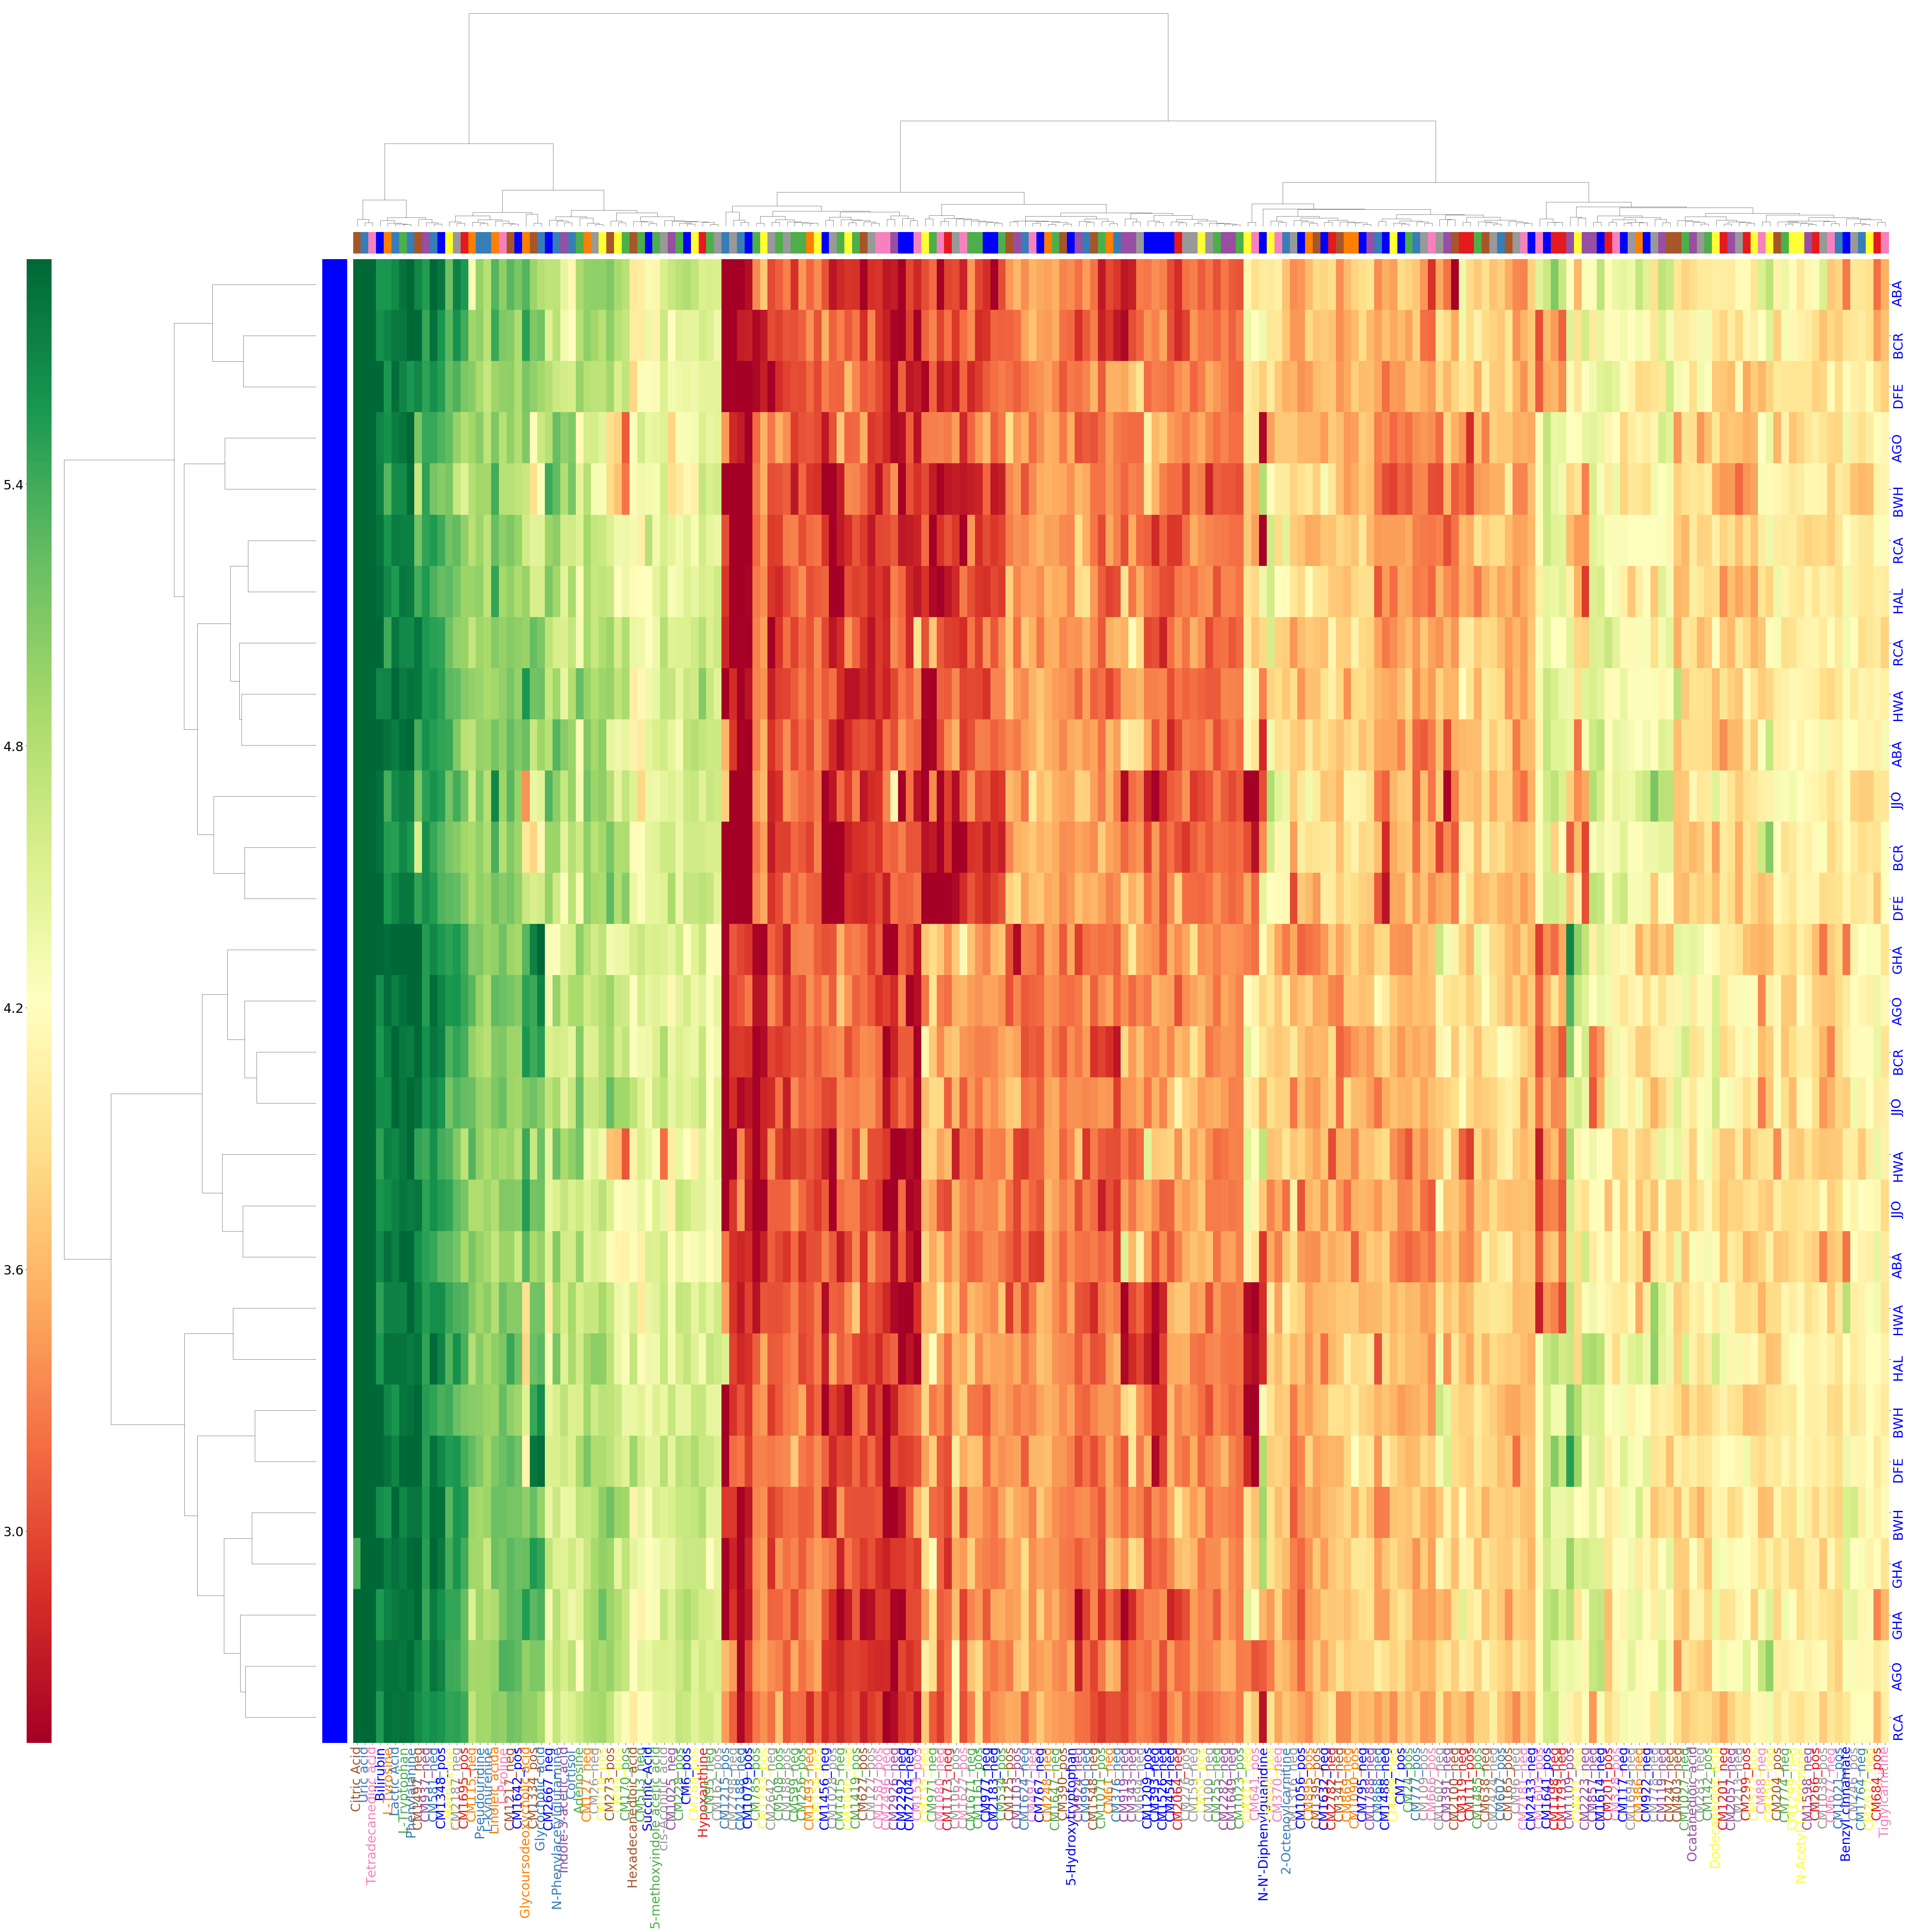

In [30]:
cluster = multivis.clustermap(matrix, row_linkage, col_linkage)

heatmap_params = dict({'yLabels': list(DataTable['Subject']), 'xLabels': list(PeakTable['Label'])
                       , 'heatmap_cmap': 'RdYlGn'}) # Set colour palette of heatmap

#heatmap_params = dict({'xLabels': list(PeakTable['Label']), 'yLabels': list(PeakTable['Label'])
#                       , 'heatmap_cmap': 'RdYlGn'}) # Set colour palette of heatmap

cluster_params = dict({'cluster_cmap': 'Set1' # Set colour palette of row and column clusters
                       , 'rowColorCluster': True, 'colColorCluster': True, 'row_color_threshold': 2, 'col_color_threshold': 2})

params = dict({'imageFileName': 'clusterMap.png', 'saveImage': True, 'dpi': 200, 'figSize': (80,70), 'dendrogram_ratio_shift': 0.08, 'fontSize': 30, 'heatmap_params': heatmap_params, 'cluster_params': cluster_params})

cluster.set_params(**params)

cluster.run()